Train inputshape (1,224,224,3)
trangialongai18

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator


In [18]:
# train= pd.read_csv('/content/drive/MyDrive/dataset/ASL_TRAIN.csv')
# test=pd.read_csv('/content/drive/MyDrive/dataset/ASL_TEST.csv')
# train
X_train=np.load('/content/drive/MyDrive/dataset/ASL_X.npy')
y_train=np.load('/content/drive/MyDrive/dataset/ASL_Y.npy')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [19]:
X_train.shape, y_train.shape

((4355, 224, 224, 3), (4355,))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,random_state=36)

34
31
29
9
20
19
35
16
27
7
20
19
26
35
14
29
4
3
21
25
20
35
9
9
27


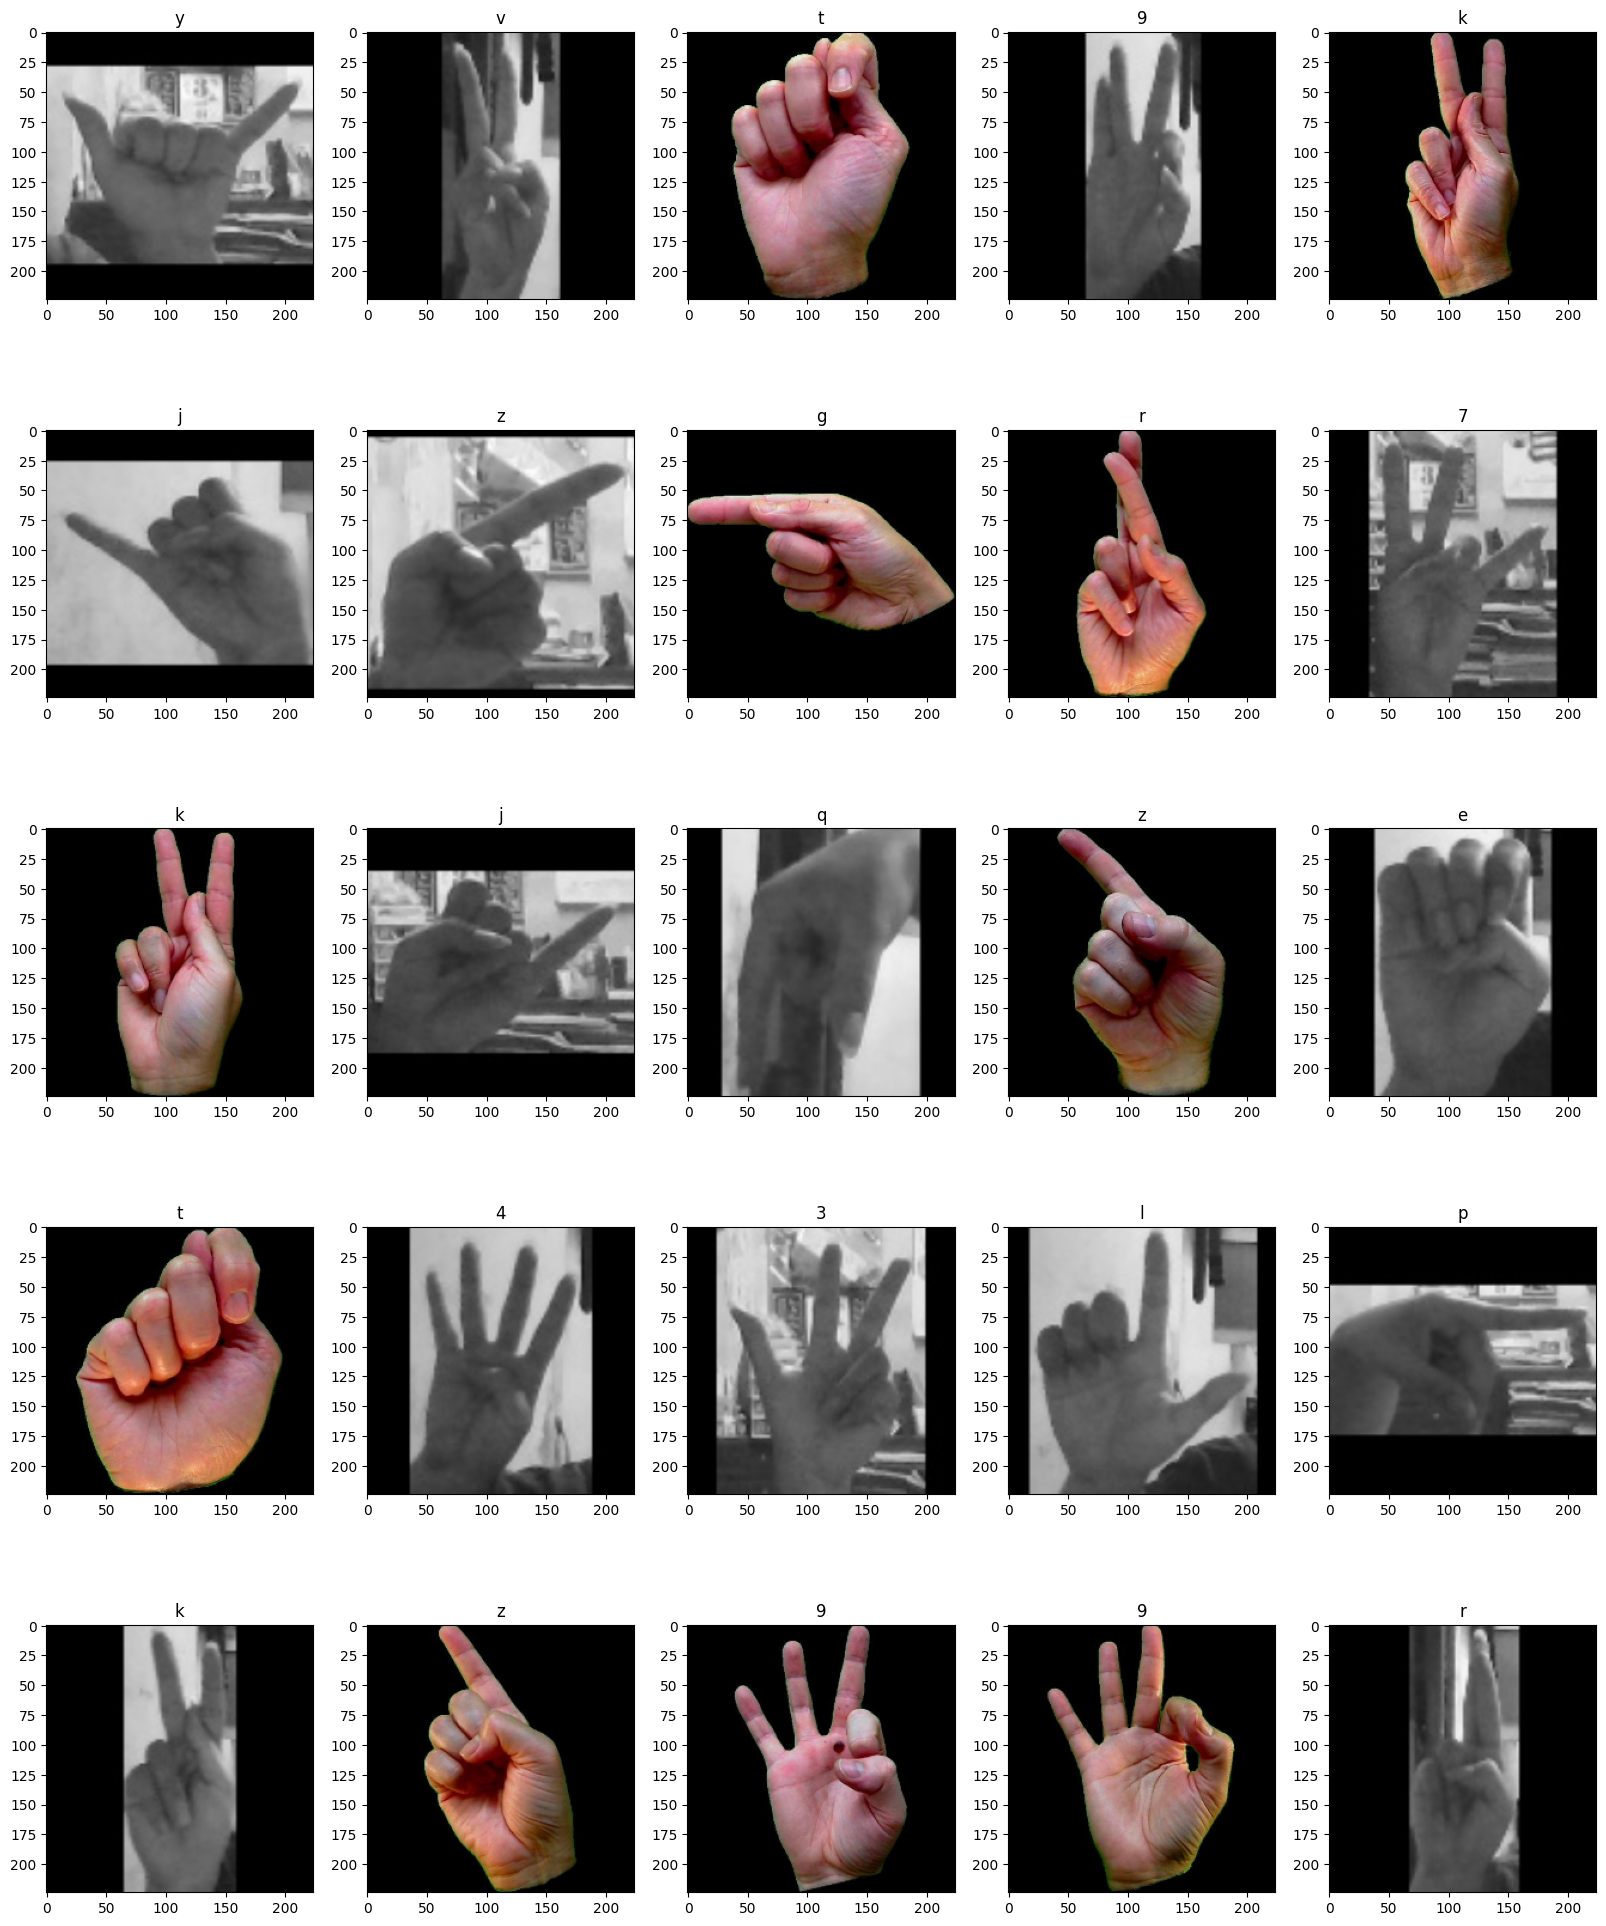

In [11]:
plt.figure(figsize=(20, 25))

for i in range(5*5):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    label = y_train[i]
    print(label)
    plt.title(classes[label])
    i+=1


In [ ]:
# datagen = ImageDataGenerator(
#         validation_split=0.2,
#         rotation_range = 20,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image
#         shear_range = 0.3,# shear angle in counter-clockwise direction in degrees
#         width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
#         vertical_flip=True,
#         horizontal_flip=True,fill_mode='nearest')  # randomly flip images

In [12]:
def create_model_cnn(input_shape):
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(5,5),  activation='relu', input_shape=input_shape),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Flatten(),


        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(36, activation='softmax')
    ])

    return model

In [36]:
model = create_model_cnn((224,224,3))
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adam(0.001),
                metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 32)       

In [35]:
folder=r'/content/drive/MyDrive/Model/'#đường dẫn
checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath=folder+'ep{epoch:02d}_asl_model_cnn_acc_{accuracy:.2f}_val_acc_{val_accuracy:.2f}.h5',#cộng thêm tên file cấu trúc
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [22]:
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((2787, 224, 224, 3),
 (697, 224, 224, 3),
 (871, 224, 224, 3),
 (2787,),
 (697,),
 (871,))

In [23]:
label_train=[]
label_test=[]
label_val=[]

In [24]:
for x in y_train:
  if x not in label_train:
    label_train.append(x)

In [25]:
for x in y_test:
  if x not in label_test:
    label_test.append(x)

In [26]:
for x in y_val:
  if x not in label_val:
    label_val.append(x)

In [27]:
len(label_train),len(label_test),len(label_val)

(36, 36, 36)

In [37]:
epoch=500
batch_size=32
earlystopping = keras.callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="auto", patience = 10,
                                        restore_best_weights = True)
# lr_decay=keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.96 ** (x+epoch))
history=model.fit(X_train, y_train, batch_size=batch_size,
            epochs=epoch,
            validation_data=(X_val,y_val),verbose=1,
            callbacks=[earlystopping,checkpoint])

Epoch 1/500
88/88 [==============================] - 6s 46ms/step - loss: 10.9577 - accuracy: 0.5235 - val_loss: 0.5124 - val_accuracy: 0.8479


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/500
88/88 [==============================] - 8s 89ms/step - loss: 0.3264 - accuracy: 0.9085 - val_loss: 0.2732 - val_accuracy: 0.9340
Epoch 3/500
88/88 [==============================] - 4s 40ms/step - loss: 0.1527 - accuracy: 0.9602 - val_loss: 0.2714 - val_accuracy: 0.9383
Epoch 4/500
88/88 [==============================] - 3s 36ms/step - loss: 0.0960 - accuracy: 0.9738 - val_loss: 0.3129 - val_accuracy: 0.9369
Epoch 5/500
88/88 [==============================] - 3s 39ms/step - loss: 0.0815 - accuracy: 0.9817 - val_loss: 0.2211 - val_accuracy: 0.9455
Epoch 6/500
88/88 [==============================] - 3s 37ms/step - loss: 0.0298 - accuracy: 0.9914 - val_loss: 0.2296 - val_accuracy: 0.9498
Epoch 7/500
88/88 [==============================] - 4s 41ms/step - loss: 0.0399 - accuracy: 0.9900 - val_loss: 0.2395 - val_accuracy: 0.9512
Epoch 8/500
88/88 [==============================] - 3s 36ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.2503 - val_accuracy: 0.9469
Epoch 

In [38]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 1s 19ms/step - loss: 0.2028 - accuracy: 0.9483


[0.20278236269950867, 0.9483352303504944]

In [41]:
model.save('/content/drive/MyDrive/Model/model_94acc.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
model=keras.models.load_model('/content/drive/MyDrive/Model/ep14_asl_model_cnn_acc_0.99_val_acc_0.95.h5')
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 12ms/step - loss: 0.2932 - accuracy: 0.9495


[0.29317033290863037, 0.949483335018158]

In [44]:
y_predict=model.predict(X_test)

28/28 [==============================] - 0s 11ms/step


In [50]:
y_pred=[]

In [51]:
for x in y_predict:
  print(np.argmax(x))
  y_pred.append(np.argmax(x))

7
34
6
20
24
17
3
32
11
7
28
14
4
22
9
20
11
33
14
15
21
6
28
26
34
34
9
15
33
23
18
29
30
27
9
13
8
12
21
35
25
8
13
6
35
24
29
33
25
20
30
21
12
23
10
13
16
16
13
20
3
31
29
8
13
9
32
2
0
9
10
27
12
16
15
30
6
13
20
20
35
29
16
21
17
12
9
16
8
19
18
30
19
24
20
24
19
10
12
15
33
22
17
27
18
17
2
22
1
24
23
16
19
6
5
2
26
34
27
9
27
5
34
32
12
15
17
22
6
12
14
20
18
13
16
8
2
26
31
24
12
21
19
4
11
7
27
6
1
16
25
24
34
28
21
7
7
35
15
7
6
30
27
17
11
6
10
21
28
3
0
8
6
6
1
24
8
21
6
2
0
17
5
1
15
33
6
2
9
21
17
35
9
18
35
9
18
23
6
0
15
27
0
11
0
35
3
33
1
7
10
33
35
24
11
30
35
23
3
34
3
1
22
20
29
20
33
22
12
27
19
31
33
27
23
24
29
34
21
35
34
2
18
0
0
14
13
17
10
9
9
35
24
9
19
35
15
9
10
22
12
23
9
17
18
16
3
1
16
24
21
31
20
2
17
17
20
34
20
11
32
25
18
15
9
32
34
30
4
15
18
0
3
20
5
0
28
25
19
2
20
21
7
14
15
6
18
11
24
4
2
34
9
13
6
30
2
13
34
22
23
33
23
14
19
31
25
32
22
8
4
35
16
16
5
29
30
33
9
2
28
27
29
23
28
15
11
30
0
24
26
28
8
21
1
25
23
35
13
3
16
3
13
27
10
29
17
4

In [52]:
y_pred=np.array(y_pred)

In [56]:
y_test.shape, y_pred.shape

((871,), (871,))

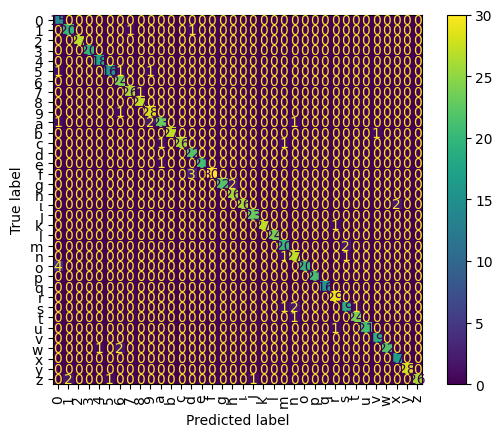

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=classes)

fig, ax = plt.subplots()

disp.plot(ax=ax)

# Get the x-axis labels
x_labels = ax.get_xticklabels()

# Rotate the x-axis labels by 45 degrees
for label in x_labels:
    label.set_rotation(90)


In [53]:
model_history = pd.DataFrame(history.history)
# model_history=model_history.reset_index()
model_history.shape

(15, 4)

<Axes: >

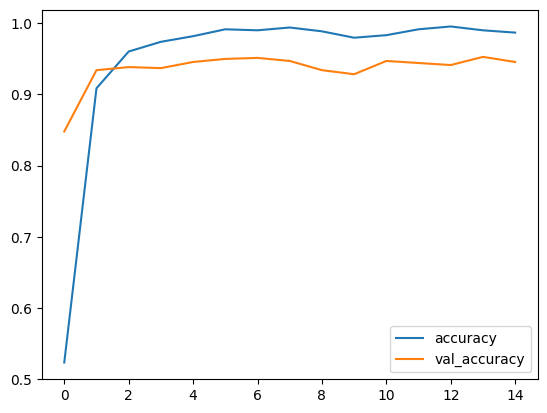

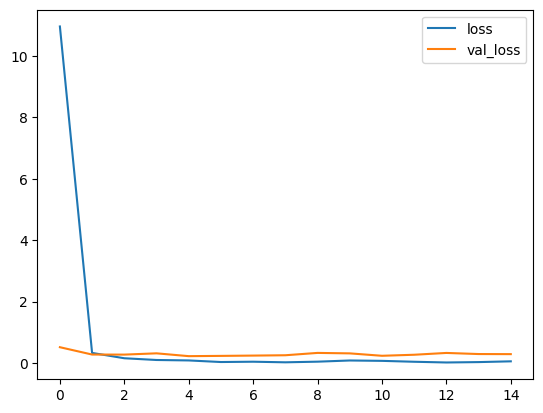

In [54]:
model_history.loc[:,['accuracy','val_accuracy']].plot()
model_history.loc[:,['loss','val_loss']].plot()